In [1]:
import selenium
from selenium import webdriver
import time
from skimage import io
import matplotlib.pyplot as plt
from urllib import error
import requests
import os
# This is the path I use
# DRIVER_PATH = '.../Desktop/Scraping/chromedriver 2'
# Put the path for your ChromeDriver here
DRIVER_PATH = "/Users/jsusser/Desktop/chromedriver"
wd = webdriver.Chrome(executable_path=DRIVER_PATH)


In [2]:
wd.get('https://google.com')

In [3]:
search_box = wd.find_element_by_css_selector('input.gLFyf')
search_box.send_keys('Dogs')

In [4]:
def split(x):
    line = []
    final = []
    num = 1
    for y in x.split(' '):
        line.append(y)
        if num/3 == int(num/3):
            final.append(' '.join(line))
            line = []
            
        num += 1
    final.append(' '.join(line))
    return '\n'.join(final)

        

In [6]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, manager:manager, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = []
    alts = []
    hrefs = []
    
    
    scroll_to_end(wd)

    # get all image thumbnail results
    thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
    number_results = len(thumbnail_results)

    #print(f"Found: {number_results} search results. Extracting links from 0:{number_results}")
    
    p = 0
    
    while True:
        if len(thumbnail_results) < 1:
            break
        img = thumbnail_results[p]
        if p == 5: 
            break
        p+=1
        # try to click every thumbnail such that we can get the real image behind it
        try:
            img.click()
            time.sleep(sleep_between_interactions)
            #print(wd.page_source)
        except Exception:
            image_urls.append(img.get_attribute('src'))
            #print(img.get_attribute('src'))
            alts.append(img.get_attribute('alt'))
            a = wd.find_elements_by_css_selector("a.VFACy.kGQAp.sMi44c.lNHeqe.WGvvNb")
            for i in a[:1]:
                txt = i.text
                if len(txt)>0:
                    href = i.get_attribute('href')
                    print(txt)
                    print(href)
            print("hey")
            continue
        list_links=wd.find_elements_by_css_selector('a.ZsbmCf')
        for i in list_links:
            txt = i.text
            if len(txt)>0:
                href = i.get_attribute('href')
                print(txt)
                print(href)

        # extract image urls

        actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                try: 
                    image = io.imread(actual_image.get_attribute('src'))

                    plt.imshow(image)

                    alt = actual_image.get_attribute('alt')
                    plt.title(split(alt))
                    plt.show()

                    image_urls.append(actual_image.get_attribute('src'))
                    alts.append(actual_image.get_attribute('alt'))
                except error.HTTPError as e:
                    print("nope")

        which = list(filter(lambda x: manager.split(" ")[-1] in alts[x], range(len(alts))))
        if len(which) >= 1 and p >= 3:
            break
        
        
    
    
    
    
        

    return image_urls, alts, hrefs



---------------------



 Michael Paul Byrum
Amazon.com
https://www.amazon.com/NASDAQ-100-Investors-Guide-2002-2003-Michael/dp/0735203229


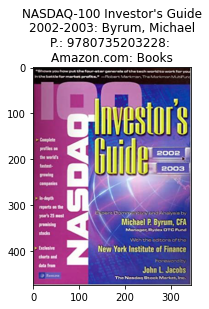

Irish Mirror
https://www.irishmirror.ie/showbiz/irish-showbiz/paul-byrom-tenor-marriage-split-21093312


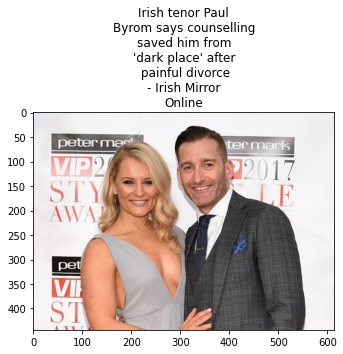

Citywire USA
https://citywireusa.com/professional-buyer/manager/michael-p-byrum/d23895


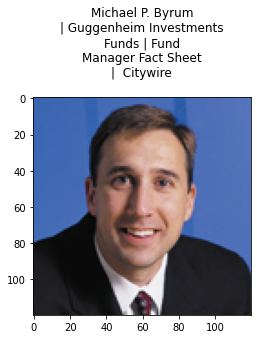



---------------------



 Jim King
U.S. Long Short Momentum Fund ...
sec.gov
https://www.sec.gov/Archives/edgar/data/899148/000119312511326131/d258481d485bpos.htm
hey
U.S. Long Short Momentum Fund ...
sec.gov
https://www.sec.gov/Archives/edgar/data/899148/000119312511326131/d258481d485bpos.htm
hey
Yahoo Finance
https://finance.yahoo.com/news/billionaire-jim-simons-pulls-trigger-140441628.html


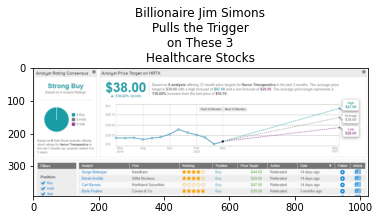

In [7]:
import pandas as pd
import urllib.request
import numpy as np
%matplotlib inline
num = 0
df = pd.read_csv("final_managers.csv")
for index, instance in df.iterrows():
    num += 1
    if num > 2:
        break
    if num < 1:
        continue
    equity = instance["2"]
    manager = instance["3"]
    #pd.isna(manager)
    
    if manager != manager:
        continue
        
    print("\n\n---------------------\n\n\n\n",manager)
    img_urls, alts, hrefs = fetch_image_urls(equity+" "+manager,3,wd, manager)
    

    if img_urls == []:
        continue
    
    n_alts = list(alts)
    n_img_urls = list(img_urls)
    
    

    
    which = list(filter(lambda x: manager.split(" ")[-1] in n_alts[x], range(len(n_alts))))
    
    if not manager in os.listdir("/Users/jsusser/Desktop/managers/"):
        os.mkdir("/Users/jsusser/Desktop/managers/{}".format(manager))
    if len(which) >= 1:
        for x in which:
            imgURL = n_img_urls[x]
            urllib.request.urlretrieve(imgURL, "/Users/jsusser/Desktop/managers/{}/{}.jpg".format(manager,manager))
    else:
        imgURL = n_img_urls[0]
        urllib.request.urlretrieve(imgURL, "/Users/jsusser/Desktop/managers/{}/{}.jpg".format(manager,manager))
        
        
plt.show()   
        

In [462]:
import requests
import io
import PIL
response = requests.get('https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/dogs_1280p_0.jpg?itok=cnRk0HYq')
image_bytes = io.BytesIO(response.content)

img = PIL.Image.open(image_bytes)
img.show()




"""for x in range(len(img_urls)):
        try: 
            image = io.imread(img_urls[x])
            plt.imshow(image)
            plt.title(alts[x])
            plt.show()
            print(img_urls[x])
        except error.HTTPError as e:
            print("nope")
            n_img_urls.remove(img_urls[x])
            n_alts.remove(alts[x])"""



            image_urls.append(img.get_attribute('src'))
            #print(img.get_attribute('src'))
            alts.append(img.get_attribute('alt'))
            a = wd.find_elements_by_css_selector("a.VFACy.kGQAp.sMi44c.lNHeqe.WGvvNb")
            for i in a[:1]:
                txt = i.text
                if len(txt)>0:
                    href = i.get_attribute('href')
                    print(txt)
                    print(href)
            print("hey")
            continue

In [8]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, manager:manager, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = []
    alts = []
    hrefs = []
    
    
    scroll_to_end(wd)
    #print(wd.page_source)
    # get all image thumbnail results
    thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
    number_results = len(thumbnail_results)

    #print(f"Found: {number_results} search results. Extracting links from 0:{number_results}")
    
    p = 0
    a = wd.find_elements_by_css_selector("a.VFACy.kGQAp.sMi44c.lNHeqe.WGvvNb")
    global z
    for p in range(10):
        if len(thumbnail_results) < 1:
            break
        i = a[p]
        img_real = thumbnail_results[p]
        img = img_real.get_attribute('src')
        alt = img_real.get_attribute('alt')
        image_urls.append(img)
        txt = i.text
        href = i.get_attribute('href')
        print(txt)
        print(href)
        alts.append(txt)
        
        try: 
            imgURL = img
            path = "/Users/jsusser/Desktop/managers/{}/{}{}.jpg".format(manager,p,manager)
            urllib.request.urlretrieve(imgURL, path)
            check.loc[z] = [manager,href, txt, alt, path]
            z += 1
        except error.HTTPError as e:
            continue
        
    
    
    
        

    return image_urls, alts, hrefs

In [17]:
import pandas as pd
import urllib.request
import numpy as np
%matplotlib inline
num = 1
df = pd.read_csv("final_managers.csv")
global check
global num
check = pd.DataFrame({}, columns=["manager","href", "href_text", "alt", "img"])

z = 0

for index, instance in df.iterrows():
    
    if num > 2:
        break
    
    equity = instance["2"]
    manager = instance["3"]
    #pd.isna(manager)
    
    if manager != manager:
        continue
        
    if not manager in os.listdir("/Users/jsusser/Desktop/managers/"):
        os.mkdir("/Users/jsusser/Desktop/managers/{}".format(manager))
        
    print("\n\n---------------------\n\n\n\n",manager)
    img_urls, alts, hrefs = fetch_image_urls(equity+" "+manager,3,wd, manager)
    
    num += 1
    
        
 
        



---------------------



 Michael Paul Byrum
NASDAQ-100 Investor's Guide 2002-2003 ...
amazon.com
https://www.amazon.com/NASDAQ-100-Investors-Guide-2002-2003-Michael/dp/0735203229
Irish tenor Paul Byrom says counselling ...
irishmirror.ie
https://www.irishmirror.ie/showbiz/irish-showbiz/paul-byrom-tenor-marriage-split-21093312
Michael P. Byrum | Guggenheim ...
citywireusa.com
https://citywireusa.com/professional-buyer/manager/michael-p-byrum/d23895
Celtic Thunder Paul Byrom Photo Card ...
celticthunder.com · In stock
https://www.celticthunder.com/shop/product/celtic-thunder-paul-byrom-photo-card/
U.S. Long Short Momentum Fund ...
sec.gov
https://www.sec.gov/Archives/edgar/data/899148/000119312511326131/d258481d485bpos.htm
Celtic Thunder Paul Byrom Scarf Signed ...
celticthunder.com · In stock
https://www.celticthunder.com/shop/product/celtic-thunder-paul-byrom-scarf-signed-photo/
17 Paul Byrom Photos and Premium High ...
gettyimages.com
https://www.gettyimages.com/photos/paul-byrom
R

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
done = os.listdir("/Users/jsusser/desktop/final_managers")
bad = []
for manager in check["manager"].unique():
    if "%s.jpg" % manager in done:
        continue
    plt.figure(figsize=(20,10))
    k = 0
    for index, instance in check[check["manager"]==manager].iterrows():
        plt.subplot(2,5,k+1)
        img=mpimg.imread(instance["img"])
        imgplot=plt.imshow(img)
        plt.title(instance["href_text"])
        k += 1
    href_texts = check[check["manager"]==manager]['href_text']
    href_texts = np.array(href_texts).tolist()
    which = list(filter(lambda x: manager.split(" ")[-1] in href_texts[x], range(len(href_texts))))
    plt.show()
    if len(which) < 1:
        which = 1
    else: 
        which = which[0]+1
    choice = input("We think its %s:" % (which))
    if len(choice) < 1:
        choice = which-1
    if choice == "n": 
        bad.append(manager)
    img=cv2.imread(np.array(check[check["manager"]==manager]['img']).tolist()[int(choice)])
    cv2.imwrite("/Users/jsusser/Desktop/final_managers/%s.jpg" % manager, img)
    
    
    